# The Use of Matrices in Computer Graphics
### By Shahzeb Khan
For Professor Philley's Linear Algebra class.

In [1]:
%matplotlib inline
import numpy as np

from pylab import *
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

Let's initialize a square box shape called `box`. Here we are just defining the coordinates needed to make the box. Important to note that computers draw their grid system slightly different than we are use to. The origin `(0,0)` is located at the top left. The y-axis increases positively downwards. The x-axis is unchanged. Another change in computer graphics is that coordinates are written `(y,x)`/`(n,m)` instead of `(x,y)`/`(m,n)`. Both of these changes are a result of monitors conventionally drawing graphics from the top left downward.

In [2]:
# Define the coordinates that make up our box shape in the format of (y,x)
box = np.array([[5,5],
                [6,5],
                [5,6],
                [6,6]])

Let's go ahead and define a function called `drawShape` which can draw any coordinates onto a grid which is similar to our monitor's. Let's also define a function called `getImageMatrix` which takes any shape matrix and returns a `(10,10)` matrix where everything is 0 except the pixels which create the shape are set to 1.

In [3]:
def drawShape(coordinates):
    """Draws an image and returns a matrix of that image"""
    figure(1)
    imshow(coordinates, interpolation='nearest')
    grid(False)
    
def getImageMatrix(shape, size=10):
    """Return a (10,10) matrix which contains 1's for the shape"""
    matrix = np.zeros((size, size),dtype=np.int16)
    for i in shape:
        matrix[i[0]][i[1]] = 1
    return matrix

Now we can run the `boxShape` function to draw the image while passing in our earlier defined box as the shape we would like to draw:

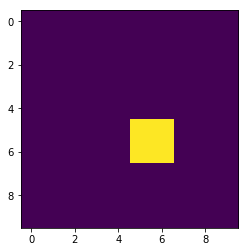

In [4]:
boxMatrix = getImageMatrix(box)
drawShape(boxMatrix)

Now that we have drawn the image using the `drawShape` function, we have also set the variable `boxMatrix` to be the matrix representation of this image. Let's take a look:

In [5]:
print(boxMatrix)

[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 1 0 0 0]
 [0 0 0 0 0 1 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]


Notice how every element of the matrix is set to 0 with the exception of 1's appearing at every location that we decided to 'turn on' our box pixels. Now, let's try multiplying this `boxMatrix` with the identity matrix of `[1,0],[0,1]`. We will draw out the result of the matrix multiplication:

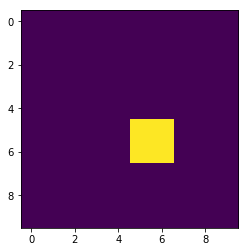

In [6]:
identity = np.array([[1,0], # Where the identity matrix is defined
                     [0,1]]) 
identityMul = np.matmul(box, identity) # 
boxMatrix2 = getImageMatrix(identityMul)
drawShape(boxMatrix2)

### Vector graphics
Now, we are going to need a better way to represent our pixels. Instead of adding boxes (pixels) to our image, we will plot lines (vectors). These lines will act exactly how vector graphics function. Let's go ahead and define the vertices of a shape that resembles the letter "F":

In [7]:
fShape = np.array([[0,0],
                   [1,0],
                   [1,2],
                   [2,2],
                   [2,3],
                   [1,3],
                   [1,4],
                   [3,4],
                   [3,5],
                   [0,5],
                   [0,0]])

From here on out, we'll go back to the familiar `(x,y)` plot that we know of where the x-axis and y-axis are back to their normal state, and the origin `(0,0)` is in the center of the screen. In order to get our `fShape` matrix to appear on the screen, let us define a function called `drawVector` which takes in a matrix as a `shape` and draws all the individual lines one after another.

In [8]:
# Function which draws any vector onto a plot
def drawVector(objs, scale, zoomed = True):
    first = True
    plt.axhline(0, color='black')
    plt.axvline(0, color='black')
    for obj in objs:
        shape = obj[0]
        color = obj[1]
        for i in shape:
            if first:
                last = i
                first = False
            else:
                x = i[0]
                y = i[1]
                lastx = last[0]
                lasty = last[1]
                plt.plot([lastx, x], [lasty, y], color) # (x1,x2) (y1,y2)
                last = i
    if zoomed:
        plt.xlim(-1, scale)
        plt.ylim(-1, scale)
    else:
        plt.xlim(-scale, scale)
        plt.ylim(-scale, scale)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

Now that we have a function called `drawVector` we can pass in our `fShape` variable which contains the verticies to create the letter F: 

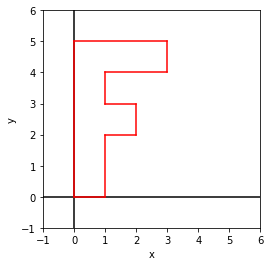

In [9]:
drawVector([[fShape, "red"]], 6)

### Transformations

#### Scaling
We can use matrix multiplication to change our graphic's scale. For instance, if we wanted to scale our shape by a factor of 2, we could represent that transformation with the following matrix:

In [10]:
%%latex
$$
\left(\begin{array}{cc} s_{x} & 0\\ 0 & s_{y} \end{array}\right) * 
\left({\begin{array}{cc} x \\ y \end{array}}\right)
$$

<IPython.core.display.Latex object>

In the first diagonal matrix, s<sub>x</sub> is the desired scaling factor on the x-axis, and s<sub>y</sub> is the desired scaling factor on the y-axis. In the second matrix, `x` and `y` are the original elements of the vertex location. This matrix multiplication yields the following linear system:

In [11]:
%%latex
$$(s_{x}*x) + 0y = s_{x}*x$$ 
$$0x + (s_{y}*y) = s_{y}*y$$

<IPython.core.display.Latex object>

So if we wanted to scale our F shape by a factor of 2, that would look like the following:

In [12]:
%%latex
$$
\left(\begin{array}{cc} 2 & 0\\ 0 & 2 \end{array}\right) * 
\left({\begin{array}{cc} x \\ y \end{array}}\right) = 
\left({\begin{array}{cc} 2x \\ 2y \end{array}}\right)
$$

<IPython.core.display.Latex object>

Now let's go ahead and draw our original F shape in red and our F shape scaled by `x2` in blue:

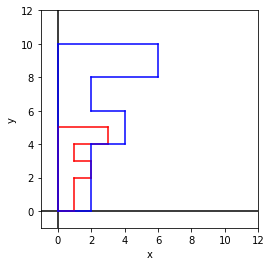

In [13]:
doubleScaleMatrix = np.array([[2,0], # define the matrix we will multiply with
                              [0,2]]) 
doubleScale = np.matmul(fShape, doubleScaleMatrix); # do the matrix mult
drawVector([[fShape, "red"],[doubleScale, "blue"]], 12)

We don't necessarily need to scale both the x and y elements by the same amount. For instance, the following matrix where we scale the x-axis by `3/2` and the y-axis by `1` is completely valid.

In [14]:
%%latex
$$
\left(\begin{array}{cc} \frac{3}{2} & 0\\ 0 & 2 \end{array}\right) * 
\left({\begin{array}{cc} x \\ y \end{array}}\right) = 
\left({\begin{array}{cc} \frac{3}{2}x \\ 2y \end{array}}\right)
$$

<IPython.core.display.Latex object>

This scaling transformation is shown here in green:

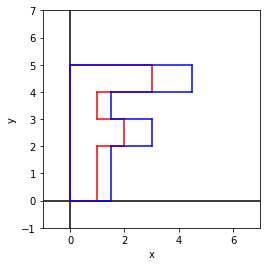

In [52]:
doubleScaleMatrix2 = np.array([[3/2,0], # define the matrix we will multiply with
                              [0,1]]) 
doubleScale2 = np.matmul(fShape, doubleScaleMatrix2); # do the matrix mult
drawVector([[fShape, "red"],[doubleScale2, "blue"]], 7)

#### Reflection
Matrices make defining a reflection extremely easy. A reflection is essentially a "swapping" of the x and y elements of a location vector. It can be described using the following matrix multiplication:

In [35]:
%%latex
$$
\left(\begin{array}{cc} 0 & 1\\ 1 & 0 \end{array}\right) * 
\left({\begin{array}{cc} x \\ y \end{array}}\right)
$$

<IPython.core.display.Latex object>

The linear system for this matrix multiplication:

In [36]:
%%latex
$$0x + 1y = 1y$$ 
$$1x + 0y = 1x$$

<IPython.core.display.Latex object>

As we can see, multiplying by the matrix `[0,1],[1,0]` successfully flipped the x and y components of the vertex. Let's see this in practice:

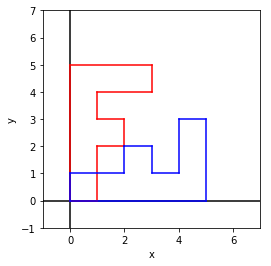

In [53]:
flippedReflectionMatrix = np.array([[0,1], # define the matrix we will multiply with
                                    [1,0]]) 
flippedReflection = np.matmul(fShape, flippedReflectionMatrix); # do the matrix mult
drawVector([[fShape, "red"],[flippedReflection, "blue"]], 7)

Though this might not look like a conventional "reflection" of the graphic over the x-axis as we are use to, flipping the `x` and `y` elements of a vector is the technical use of reflection in 2D graphics. By multiplying our "F" shape by the matrix `[0,1],[1,0]`. We can confirm this by printing the flipped reflection matrix:

In [40]:
print(flippedReflection)

[[0 0]
 [0 1]
 [2 1]
 [2 2]
 [3 2]
 [3 1]
 [4 1]
 [4 3]
 [5 3]
 [5 0]
 [0 0]]


#### Shearing
Shearing is defined as a transformation that slants the shape of an object. Shearing is often termed as "skewing" and can be achieved by utilizing the a<sub>12</sub> and a<sub>21</sub> elements of the matrix which our location vector is being multiplied. The following is known as an **X Shear** because it pushes all the points across the x-axis.

In [43]:
%%latex
$$
\left(\begin{array}{cc} 1 & s\\ 0 & 1 \end{array}\right) * 
\left({\begin{array}{cc} x \\ y \end{array}}\right)
$$

<IPython.core.display.Latex object>

This matrix multiplication yields the following linear system:

In [47]:
%%latex
$$1x + sy = x + sy$$ 
$$0x + 1y = y$$

<IPython.core.display.Latex object>

In this system `s` represents the "amount" of skewing we would like to achieve on the x-axis. A shearing transformation on the y-axis is called a **Y Shear**, and defined as the following:

In [50]:
%%latex
$$
\left(\begin{array}{cc} 1 & 0\\ s & 1 \end{array}\right) * 
\left({\begin{array}{cc} x \\ y \end{array}}\right) =
$$

<IPython.core.display.Latex object>

In [51]:
%%latex
$$1x + 0y = x$$ 
$$sx + 1y = sx + y$$

<IPython.core.display.Latex object>

Now, let's attempt an X-Shear with a factor of 1.5(so the value of `s` will be 2) using the following matrix:

In [65]:
%%latex
$$
\left(\begin{array}{cc} 1 & 1.5\\ 0 & 1 \end{array}\right)
$$

<IPython.core.display.Latex object>

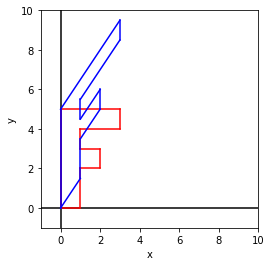

In [66]:
shearMultMatrix = np.array([[1,1.5], # define the matrix we will multiply with
                            [0,1]]) 
shearMatrix = np.matmul(fShape, shearMultMatrix); # do the matrix mult
drawVector([[fShape, "red"],[shearMatrix, "blue"]], 10)

Now, let's try a Y-Shear using s = 0.5:

In [71]:
%%latex
$$
\left(\begin{array}{cc} 1 & 0\\ 0.5 & 1 \end{array}\right)
$$

<IPython.core.display.Latex object>

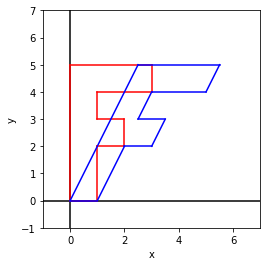

In [72]:
shearMultMatrix = np.array([[1,0], # define the matrix we will multiply with
                            [0.5,1]]) 
shearMatrix = np.matmul(fShape, shearMultMatrix); # do the matrix mult
drawVector([[fShape, "red"],[shearMatrix, "blue"]], 7)

Notice that by choosing a Y-Shearing factor of 0.5, we have essentially "moved" all the x-axis points to the right by a factor of half of the y-axis height at that given location. We can view the result of the matrix multiplication by printing out the shear matrix:

In [73]:
print(shearMatrix)

[[ 0.   0. ]
 [ 1.   0. ]
 [ 2.   2. ]
 [ 3.   2. ]
 [ 3.5  3. ]
 [ 2.5  3. ]
 [ 3.   4. ]
 [ 5.   4. ]
 [ 5.5  5. ]
 [ 2.5  5. ]
 [ 0.   0. ]]
